In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix, classification_report

In [2]:
df_1 = pd.read_csv('merged_with_label.csv')
df_1

,label,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,899
0,0,32.965541,32.940253,32.928452,32.912436,32.900804,32.877876,32.858609,32.832779,32.804821,...,33.381277,33.324632,33.270010,33.215387,33.159754,33.109177,33.056578,33.004990,32.952391,32.902827
1,0,30.679499,30.664326,30.655896,30.651682,30.651176,30.640724,30.637593,30.622600,30.619931,...,33.392404,33.334747,33.280125,33.228537,33.169869,33.123339,33.064670,33.016117,32.957449,32.912942
2,0,32.743006,32.732891,32.712660,32.694959,32.680292,32.662084,32.643299,32.620359,32.596897,...,33.377231,33.317551,33.267986,33.203249,33.147615,33.101085,33.043428,32.990829,32.938230,32.889677
3,0,31.306643,31.296528,31.299900,31.296528,31.288436,31.288098,31.274852,31.268711,31.249323,...,33.416680,33.364081,33.305413,33.251802,33.193134,33.138512,33.081866,33.030279,32.971610,32.924069
4,0,31.660676,31.660676,31.650561,31.640446,31.624261,31.608414,31.592760,31.575961,31.558400,...,33.387346,33.332724,33.278102,33.222468,33.167846,33.115246,33.063659,33.011060,32.960483,32.909907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,5,30.740190,30.654211,30.669383,30.633980,30.643084,30.630608,30.621697,30.613750,30.598577,...,32.924069,32.874504,32.824939,32.779421,32.730868,32.682315,32.634773,32.583185,32.529575,32.484056
596,5,30.851458,30.836285,30.837971,30.836285,30.833250,30.834599,30.826892,30.816054,30.807625,...,33.189088,33.139523,33.089958,33.041405,32.994875,32.950368,32.906873,32.856297,32.810778,32.756156
597,5,30.993071,30.998128,30.982956,30.988013,30.974863,30.974526,30.965615,30.958932,30.945866,...,33.271021,33.211341,33.158742,33.104120,33.053544,33.001956,32.952391,32.903838,32.856297,32.804709
598,5,33.451072,33.430842,33.417355,33.403025,33.386335,33.366779,33.344140,33.323367,33.295972,...,32.922046,32.870458,32.819882,32.771329,32.721764,32.665119,32.620612,32.569024,32.526540,32.482033


In [26]:
#Shuffling the data
df = df_1.sample(frac = 1).reset_index(drop=True)
df

,label,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,899
0,2,31.751713,31.741598,31.734854,31.723896,31.711252,31.702823,31.701137,31.679642,31.658428,...,33.059613,33.007014,32.951380,32.900804,32.849216,32.796617,32.747052,32.697487,32.651969,32.604427
1,0,33.653377,33.643262,33.626403,33.612916,33.596732,33.575827,33.555115,33.530730,33.505020,...,33.391392,33.338793,33.280125,33.230560,33.176949,33.121316,33.070739,33.016117,32.963518,32.910919
2,5,31.053762,31.048705,31.023417,31.023417,31.019370,31.016673,31.007521,31.001922,30.991947,...,32.190714,32.146207,32.099677,32.059216,32.011675,31.968179,31.924684,31.880177,31.839716,31.796220
3,3,30.608692,30.593519,30.601949,30.593519,30.588462,30.576660,30.568231,30.561909,30.552496,...,32.286809,32.236233,32.194760,32.142161,32.099677,32.047078,32.003582,31.958064,31.911534,31.867027
4,0,33.360035,33.354977,33.339805,33.322103,33.301367,33.279113,33.255993,33.227273,33.198191,...,33.410611,33.354977,33.305413,33.247756,33.192122,33.139523,33.084901,33.034325,32.980714,32.930138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3,32.257475,32.217014,32.210270,32.189197,32.174530,32.158008,32.130312,32.112068,32.087764,...,33.032302,32.980714,32.932161,32.887654,32.840112,32.781444,32.733902,32.688384,32.641854,32.593301
596,2,33.612916,33.572455,33.569083,33.544638,33.525925,33.501648,33.477083,33.454865,33.427470,...,33.066693,33.010048,32.963518,32.907884,32.859331,32.796617,32.751098,32.697487,32.648934,32.606450
597,4,32.348512,32.313109,32.301307,32.290349,32.275682,32.250731,32.232909,32.209427,32.187792,...,33.092993,33.039382,32.989818,32.938230,32.887654,32.838089,32.786501,32.743006,32.693441,32.645900
598,4,31.508948,31.473544,31.468487,31.450785,31.440164,31.422968,31.407795,31.390094,31.374078,...,33.060624,33.008025,32.955426,32.905861,32.857308,32.807743,32.759190,32.712660,32.665119,32.618589


In [27]:
y= np.array(df.label)

In [28]:
df.drop('label', axis=1,inplace= True)

In [29]:
df

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,31.751713,31.741598,31.734854,31.723896,31.711252,31.702823,31.701137,31.679642,31.658428,31.640446,...,33.059613,33.007014,32.951380,32.900804,32.849216,32.796617,32.747052,32.697487,32.651969,32.604427
1,33.653377,33.643262,33.626403,33.612916,33.596732,33.575827,33.555115,33.530730,33.505020,33.475349,...,33.391392,33.338793,33.280125,33.230560,33.176949,33.121316,33.070739,33.016117,32.963518,32.910919
2,31.053762,31.048705,31.023417,31.023417,31.019370,31.016673,31.007521,31.001922,30.991947,30.978909,...,32.190714,32.146207,32.099677,32.059216,32.011675,31.968179,31.924684,31.880177,31.839716,31.796220
3,30.608692,30.593519,30.601949,30.593519,30.588462,30.576660,30.568231,30.561909,30.552496,30.541931,...,32.286809,32.236233,32.194760,32.142161,32.099677,32.047078,32.003582,31.958064,31.911534,31.867027
4,33.360035,33.354977,33.339805,33.322103,33.301367,33.279113,33.255993,33.227273,33.198191,33.171892,...,33.410611,33.354977,33.305413,33.247756,33.192122,33.139523,33.084901,33.034325,32.980714,32.930138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,32.257475,32.217014,32.210270,32.189197,32.174530,32.158008,32.130312,32.112068,32.087764,32.067308,...,33.032302,32.980714,32.932161,32.887654,32.840112,32.781444,32.733902,32.688384,32.641854,32.593301
596,33.612916,33.572455,33.569083,33.544638,33.525925,33.501648,33.477083,33.454865,33.427470,33.401508,...,33.066693,33.010048,32.963518,32.907884,32.859331,32.796617,32.751098,32.697487,32.648934,32.606450
597,32.348512,32.313109,32.301307,32.290349,32.275682,32.250731,32.232909,32.209427,32.187792,32.161380,...,33.092993,33.039382,32.989818,32.938230,32.887654,32.838089,32.786501,32.743006,32.693441,32.645900
598,31.508948,31.473544,31.468487,31.450785,31.440164,31.422968,31.407795,31.390094,31.374078,31.354185,...,33.060624,33.008025,32.955426,32.905861,32.857308,32.807743,32.759190,32.712660,32.665119,32.618589


In [30]:
df.shape

(600, 900)

### Data scaling

In [31]:
#Data scaling# MinMax scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df)
X

array([[0.38121547, 0.37935844, 0.3781279 , ..., 0.35471373, 0.35332183,
        0.35311958],
       [0.90055249, 0.90376569, 0.89805375, ..., 0.49031425, 0.486195  ,
        0.48440208],
       [0.19060773, 0.18828452, 0.18257646, ..., 0.00688765, 0.0069025 ,
        0.00693241],
       ...,
       [0.5441989 , 0.53695955, 0.53382762, ..., 0.37408523, 0.37100949,
        0.37088388],
       [0.31491713, 0.30543933, 0.30491196, ..., 0.3611709 , 0.35893011,
        0.35918544],
       [0.43646409, 0.43096234, 0.42632067, ..., 0.31381834, 0.30974978,
        0.31065858]])

In [9]:
# #Data scaling# Standard scaler
# scaler = StandardScaler()
# X = scaler.fit_transform(df)
# X

In [32]:
X = np.array(df).reshape(df.shape[0],30,30,1)
X.shape

(600, 30, 30, 1)

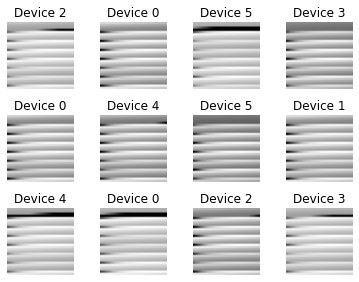

In [33]:
plt.figure(figsize = (6, 6))

for i in range(12):
    plt.subplot(4, 4, i+1).set_title(f'Device {y[i]}')
    plt.imshow(np.squeeze(X[i]),cmap='gray' )# cmap='gray'
    plt.axis('off')
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

plt.savefig('image_subplot.pdf', bbox_inches= 'tight',pad_inches = 0, dpi=100)
plt.show()

In [12]:
y.shape

(600,)

### Train/test split

In [13]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30,random_state= 42)#stratify=y, random_state= 42

In [14]:
len(X_train)

420

In [15]:
#Print shapes
print('Train shape: ',X_train.shape)
print('Test  shape: ',X_test.shape)
print('Single image shape:', X_train[0].shape)
print('Train_labels shape:', y_train.shape)
print('Test_labels shape:', y_test.shape)

Train shape:  (420, 30, 30, 1)
Test  shape:  (180, 30, 30, 1)
Single image shape: (30, 30, 1)
Train_labels shape: (420,)
Test_labels shape: (180,)


In [16]:
X_train_scaled = X_train 
X_test_scaled = X_test

In [17]:
# #scaling data from 0 to 1
# X_train_scaled = X_train/36 #Max voltage value 36
# X_test_scaled = X_test/36

In [18]:
X_train_scaled[101].shape

(30, 30, 1)

In [19]:
y_test[5:25]

array([3, 3, 1, 4, 2, 4, 0, 3, 5, 2, 1, 1, 1, 1, 2, 5, 0, 1, 1, 1],
      dtype=int64)

### CNN Models

In [21]:
#Test model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu',
                           input_shape=(X_train_scaled[0].shape)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    
    tf.keras.layers.Conv2D(32,3, padding="same", activation='relu',),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Conv2D(64,3, padding="same", activation='relu',),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Conv2D(128,3, padding="same", activation='relu',),
    tf.keras.layers.MaxPool2D(pool_size=2),

#     tf.keras.layers.Conv2D(25,3, padding="same", activation='relu',kernel_initializer='normal',),
# #     tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu',),
    tf.keras.layers.Dense(128,activation='relu',),
    tf.keras.layers.Dense(6, activation= 'softmax') #Output layer

])
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         7

In [22]:
# tf.keras.utils.plot_model(model_2, show_shapes=True)

In [23]:
# optimizers = {"RMSprop": {"optimizer": keras.optimizers.RMSprop(), "color":"blue"},
#               "adam_01": {"optimizer": keras.optimizers.Adam(lr=0.001),"color":"red"},
#               "sgd": {"optimizer": keras.optimizers.SGD(), "color":"purple"},
#               "adadelta": {"optimizer": keras.optimizers.Adadelta(), "color":"pink"},
#               "adagrad": {"optimizer": keras.optimizers.Adagrad(), "color":"yellow"}}

In [24]:
from tensorflow import keras
opt = keras.optimizers.Adam(lr= 0.001)
model_2.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
                metrics= ['accuracy'])
              
history= model_2.fit(X_train_scaled, y_train, epochs=250,batch_size=128,validation_split=0.20, verbose=1) #validation_split=0.33
history
print('Validation accuracy : ', (np.mean(history.history['val_accuracy']))*100, '%')

Epoch 1/250
3/3 [==============================] - 1s 348ms/step - loss: 2.0778 - accuracy: 0.1518 - val_loss: 1.8353 - val_accuracy: 0.1310
Epoch 2/250
3/3 [==============================] - 0s 23ms/step - loss: 1.8207 - accuracy: 0.1875 - val_loss: 1.8394 - val_accuracy: 0.1905
Epoch 3/250
3/3 [==============================] - 0s 21ms/step - loss: 1.8181 - accuracy: 0.2054 - val_loss: 1.8232 - val_accuracy: 0.1310
Epoch 4/250
3/3 [==============================] - 0s 22ms/step - loss: 1.7998 - accuracy: 0.1845 - val_loss: 1.8621 - val_accuracy: 0.1905
Epoch 5/250
3/3 [==============================] - 0s 22ms/step - loss: 1.8031 - accuracy: 0.2054 - val_loss: 1.7904 - val_accuracy: 0.1905
Epoch 6/250
3/3 [==============================] - 0s 21ms/step - loss: 1.7886 - accuracy: 0.2054 - val_loss: 1.8211 - val_accuracy: 0.1905
Epoch 7/250
3/3 [==============================] - 0s 21ms/step - loss: 1.7951 - accuracy: 0.2054 - val_loss: 1.8129 - val_accuracy: 0.1905
Epoch 8/250
3/3 [==

3/3 [==============================] - 0s 22ms/step - loss: 0.9965 - accuracy: 0.5387 - val_loss: 0.9417 - val_accuracy: 0.4405
Epoch 118/250
3/3 [==============================] - 0s 22ms/step - loss: 1.0207 - accuracy: 0.5119 - val_loss: 1.0324 - val_accuracy: 0.4762
Epoch 119/250
3/3 [==============================] - 0s 22ms/step - loss: 1.0028 - accuracy: 0.5149 - val_loss: 0.9508 - val_accuracy: 0.5000
Epoch 120/250
3/3 [==============================] - 0s 22ms/step - loss: 0.9916 - accuracy: 0.5714 - val_loss: 0.9199 - val_accuracy: 0.5238
Epoch 121/250
3/3 [==============================] - 0s 26ms/step - loss: 0.9796 - accuracy: 0.5744 - val_loss: 0.9328 - val_accuracy: 0.5476
Epoch 122/250
3/3 [==============================] - 0s 25ms/step - loss: 0.9669 - accuracy: 0.5476 - val_loss: 0.9063 - val_accuracy: 0.4881
Epoch 123/250
3/3 [==============================] - 0s 22ms/step - loss: 0.9769 - accuracy: 0.5327 - val_loss: 0.9188 - val_accuracy: 0.5238
Epoch 124/250
3/3 [=

Epoch 175/250
3/3 [==============================] - 0s 22ms/step - loss: 0.9894 - accuracy: 0.5238 - val_loss: 0.8933 - val_accuracy: 0.5476
Epoch 176/250
3/3 [==============================] - 0s 22ms/step - loss: 0.9257 - accuracy: 0.5536 - val_loss: 0.9024 - val_accuracy: 0.4762
Epoch 177/250
3/3 [==============================] - 0s 21ms/step - loss: 0.8953 - accuracy: 0.5774 - val_loss: 0.8785 - val_accuracy: 0.5238
Epoch 178/250
3/3 [==============================] - 0s 21ms/step - loss: 0.9182 - accuracy: 0.5506 - val_loss: 0.9333 - val_accuracy: 0.4405
Epoch 179/250
3/3 [==============================] - 0s 23ms/step - loss: 0.9516 - accuracy: 0.5685 - val_loss: 0.9114 - val_accuracy: 0.5000
Epoch 180/250
3/3 [==============================] - 0s 22ms/step - loss: 0.9496 - accuracy: 0.5208 - val_loss: 0.9089 - val_accuracy: 0.5238
Epoch 181/250
3/3 [==============================] - 0s 21ms/step - loss: 0.8941 - accuracy: 0.5744 - val_loss: 0.9201 - val_accuracy: 0.5238
Epoch 

Epoch 233/250
3/3 [==============================] - 0s 21ms/step - loss: 0.8411 - accuracy: 0.6042 - val_loss: 0.9575 - val_accuracy: 0.5357
Epoch 234/250
3/3 [==============================] - 0s 21ms/step - loss: 0.8419 - accuracy: 0.5893 - val_loss: 0.8594 - val_accuracy: 0.5000
Epoch 235/250
3/3 [==============================] - 0s 21ms/step - loss: 0.8264 - accuracy: 0.6131 - val_loss: 0.8557 - val_accuracy: 0.5119
Epoch 236/250
3/3 [==============================] - 0s 21ms/step - loss: 0.8434 - accuracy: 0.5982 - val_loss: 0.8584 - val_accuracy: 0.5357
Epoch 237/250
3/3 [==============================] - 0s 23ms/step - loss: 0.8115 - accuracy: 0.6161 - val_loss: 0.8853 - val_accuracy: 0.5000
Epoch 238/250
3/3 [==============================] - 0s 22ms/step - loss: 0.8192 - accuracy: 0.6131 - val_loss: 0.8653 - val_accuracy: 0.5357
Epoch 239/250
3/3 [==============================] - 0s 22ms/step - loss: 0.8571 - accuracy: 0.5714 - val_loss: 0.9124 - val_accuracy: 0.4405
Epoch 

### Accuracy

In [25]:
loss, accuracy= model_2.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
print('Test accuracy : ',accuracy*100,'%')

6/6 [==============================] - 0s 32ms/step - loss: 0.8873 - accuracy: 0.4833
Loss: 0.887312650680542, Accuracy: 0.4833333194255829
Test accuracy :  48.33333194255829 %


In [26]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


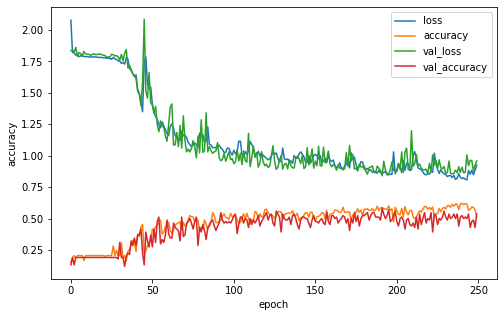

In [27]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel('epoch')
plt.ylabel('accuracy')
# plt.savefig('6_M3_train_accuracy_58.png',bbox_inches = 'tight', pad_inches = 0, dpi=100)
plt.show()

### Prediction

In [28]:
y_pred = model_2.predict(X_test_scaled)
y_pred[:10]

array([[2.8254087e-06, 7.7290309e-08, 1.7914371e-01, 3.3446705e-01,
        3.6266643e-01, 1.2371993e-01],
       [2.4299250e-06, 6.4830509e-08, 1.6267811e-01, 3.6779499e-01,
        3.1800914e-01, 1.5151529e-01],
       [4.4838887e-01, 5.4953891e-01, 4.7038808e-05, 3.3621580e-04,
        2.1584875e-04, 1.4730558e-03],
       [5.5631062e-08, 2.1658479e-09, 2.4415459e-02, 1.7178388e-01,
        6.6730261e-02, 7.3707038e-01],
       [8.3038735e-01, 1.6694608e-01, 4.3882852e-04, 2.8506492e-04,
        1.5850697e-03, 3.5762807e-04],
       [6.1190462e-06, 1.7879327e-07, 2.0497870e-01, 3.0876967e-01,
        4.1604438e-01, 7.0200942e-02],
       [7.5207577e-06, 2.1617571e-07, 2.1642974e-01, 3.0502650e-01,
        4.1935748e-01, 5.9178572e-02],
       [6.8093431e-01, 3.1527019e-01, 2.5041786e-04, 8.8637735e-04,
        8.6046185e-04, 1.7983300e-03],
       [2.3718452e-05, 6.6498853e-07, 3.0816051e-01, 3.3314806e-01,
        3.2654083e-01, 3.2126192e-02],
       [1.9634295e-05, 5.1579229e-07,

In [29]:
y_pred_class = [np.argmax(i) for i in y_pred]
y_pred_class[:10]

[4, 3, 1, 5, 0, 4, 4, 0, 3, 4]

In [30]:
y_test[:10]

array([3, 3, 1, 5, 0, 3, 3, 1, 4, 2], dtype=int64)

### Evaluation

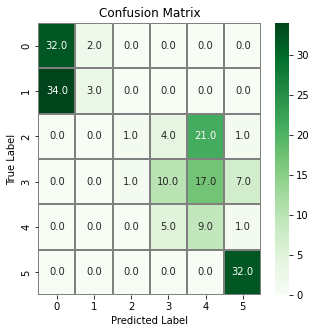

In [31]:
#Confusion matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_pred_class)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=y)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
# disp.plot(ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
# plt.savefig('6_M3_cmf_58.png',bbox_inches = 'tight', pad_inches = 0, dpi=100)
plt.show()

In [38]:
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])

True positive =  32
False positive =  2
False negative =  34
True negative =  3


In [32]:
loss, accuracy= model_2.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
print('Test accuracy : ',accuracy*100,'%')

6/6 [==============================] - 0s 12ms/step - loss: 0.8873 - accuracy: 0.4833
Loss: 0.887312650680542, Accuracy: 0.4833333194255829
Test accuracy :  48.33333194255829 %


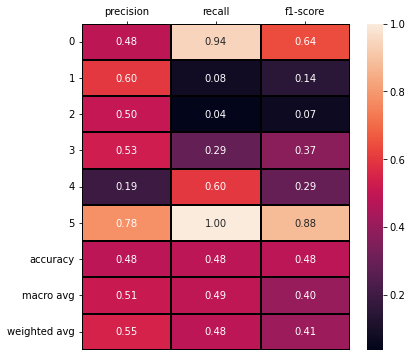

In [33]:
clf_report= classification_report(y_test, y_pred_class,output_dict=True)

 #.iloc[:-1, :] to exclude support
fig, ax = plt.subplots(figsize=(6,6))

# sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="Blues",linecolor="black", fmt= '.2f')
ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,linewidths=0.01,linecolor="black", fmt= '.2f')# cmap="Blues",
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
# plt.savefig('clf_report_6-M3_device_58.png',bbox_inches = 'tight', pad_inches = 0, dpi= 100)
